In [96]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

**Data Creation:**

In [62]:
from sklearn.datasets import make_circles

samples=5000
X,Y=make_circles(samples, noise=0.05, random_state=42)

In [63]:
X.shape, Y.shape

((5000, 2), (5000,))

In [64]:
X[:10], Y[:10]

(array([[-0.7119167 , -0.54660896],
        [ 0.79531672,  0.10020338],
        [ 0.75168064,  0.31084651],
        [-0.89222324,  0.50235231],
        [-0.14361469,  0.93893486],
        [ 0.92302381,  0.25630235],
        [ 0.05959301,  0.91384701],
        [ 0.94693803, -0.14195416],
        [ 1.03661264, -0.13177535],
        [-0.69219566, -0.74320957]]), array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]))

In [65]:
df=pd.DataFrame({"x1":X[:,0], "x2":X[:,1], "label":Y})
df.label.value_counts()

0    2500
1    2500
Name: label, dtype: int64

**Data Viz:**

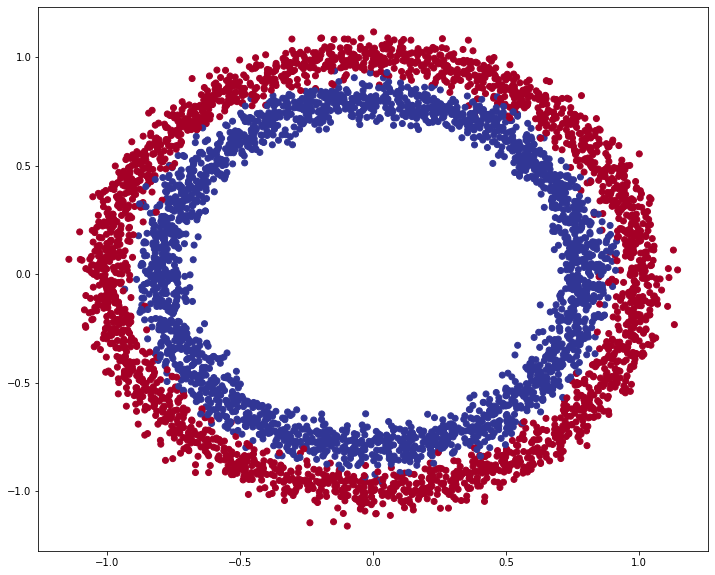

In [66]:
plt.figure(figsize=(12,10))
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=Y, 
            cmap=plt.cm.RdYlBu)

**Split:**

In [67]:
x=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(Y).type(torch.float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

len(x_train), len(x_test)

(4000, 1000)

**Custom Model:**

In [84]:
class circleClassify(nn.Module):
  def __init__(self):
    super().__init__()

    self.l1=nn.Linear(in_features=2, out_features=10) #features 2(input) -> 10(hidden)
    self.l2=nn.Linear(in_features=10, out_features=15)
    self.l3=nn.Linear(in_features=15, out_features=15)
    self.l4=nn.Linear(in_features=15, out_features=1) #features 15 -> 1(output) (same dim as y) 

    self.relu=nn.ReLU() #Non Linear Activation function for classifiying non Linearly separable data

  def forward(self, x):

    return self.l4(self.relu(self.l3(self.relu(self.l2(self.relu(self.l1(x))))))) # x -> l1 -> ReLU -> l2 -> ReLU -> l3 -> ReLU -> l4

model1=circleClassify().to(device) 
model1    

circleClassify(
  (l1): Linear(in_features=2, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=15, bias=True)
  (l3): Linear(in_features=15, out_features=15, bias=True)
  (l4): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)

**Sample Sequential model:**

In [28]:
smodel1=nn.Sequential(
    
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

smodel1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

**Loss function and optimizer:**

In [85]:
BCEloss=nn.BCEWithLogitsLoss() #BCE + Sigmoid

optimizer=torch.optim.SGD(params=model1.parameters(), lr=0.1)


**Training and Testing Loop:**

In [86]:
def accuracy_calc(y_true, y_pred):

  correct_count = torch.eq(y_true, y_pred).sum().item()
  accuracy=(correct_count/len(y_pred)) * 100
  return accuracy

In [87]:
training_loss_vals=[]
testing_loss_vals=[]
epoch_count=[]


torch.manual_seed(42)

epoch_num=2600

x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epoch_num):

  #TRAIN
  model1.train()
  y_pred_raw=model1(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_pred_raw)) #prob to labels

  loss=BCEloss(y_pred_raw, y_train)
  accuracy=accuracy_calc(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #TEST:
  model1.eval()
  with torch.inference_mode():

    test_y_pred_raw=model1(x_test).squeeze()
    test_y_pred=torch.round(torch.sigmoid(test_y_pred_raw))

    test_loss=BCEloss(test_y_pred_raw, y_test)
    test_accuracy=accuracy_calc(y_test, test_y_pred)

    if epoch % 100 == 0:
      print(f"Epoch {epoch}  Train Loss = {loss:.4f} Accuracy = {accuracy:.2f}%   Test Loss = {test_loss:.4f} Accuracy = {test_accuracy:.2f}%")

    epoch_count.append(epoch)
    training_loss_vals.append(loss.detach().numpy())
    testing_loss_vals.append(test_loss.detach().numpy())

Epoch 0  Train Loss = 0.6933 Accuracy = 50.22%   Test Loss = 0.6937 Accuracy = 47.40%
Epoch 100  Train Loss = 0.6930 Accuracy = 50.60%   Test Loss = 0.6937 Accuracy = 47.60%
Epoch 200  Train Loss = 0.6928 Accuracy = 50.60%   Test Loss = 0.6935 Accuracy = 47.60%
Epoch 300  Train Loss = 0.6926 Accuracy = 50.60%   Test Loss = 0.6934 Accuracy = 47.60%
Epoch 400  Train Loss = 0.6923 Accuracy = 50.60%   Test Loss = 0.6932 Accuracy = 47.60%
Epoch 500  Train Loss = 0.6920 Accuracy = 50.60%   Test Loss = 0.6929 Accuracy = 47.60%
Epoch 600  Train Loss = 0.6915 Accuracy = 50.70%   Test Loss = 0.6925 Accuracy = 47.70%
Epoch 700  Train Loss = 0.6909 Accuracy = 52.95%   Test Loss = 0.6920 Accuracy = 50.10%
Epoch 800  Train Loss = 0.6898 Accuracy = 52.48%   Test Loss = 0.6912 Accuracy = 52.60%
Epoch 900  Train Loss = 0.6882 Accuracy = 53.20%   Test Loss = 0.6899 Accuracy = 52.70%
Epoch 1000  Train Loss = 0.6856 Accuracy = 53.87%   Test Loss = 0.6877 Accuracy = 52.80%
Epoch 1100  Train Loss = 0.6810 A

**LOSS Plot**

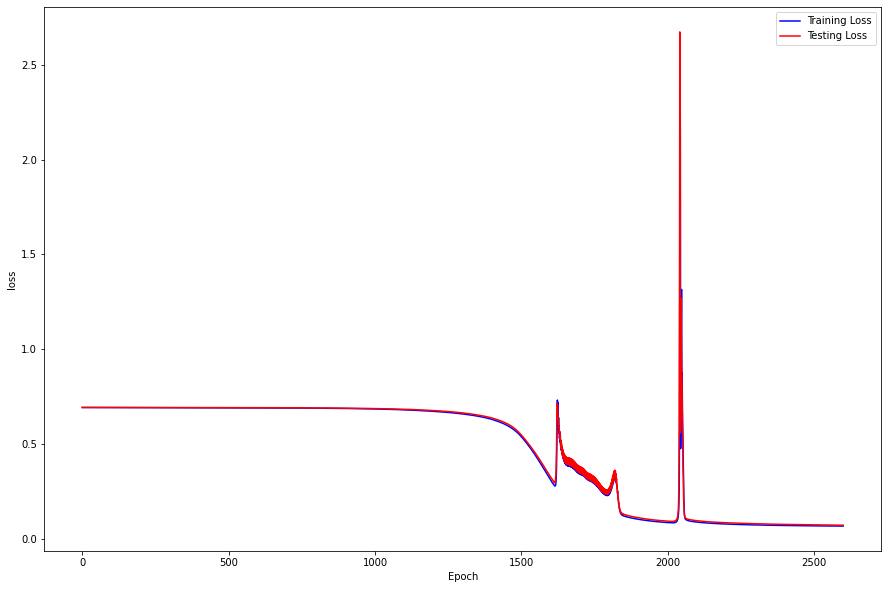

In [95]:
plt.figure(figsize=(15,10))
plt.plot(epoch_count, training_loss_vals, c="b", label="Training Loss")
plt.plot(epoch_count, testing_loss_vals, c="r", label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()

**Decision Boundary Plot:**

In [103]:
def plot_decision_boundary(model, X, y):

    """Plots decision boundaries of model predicting on X in comparison to y.
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

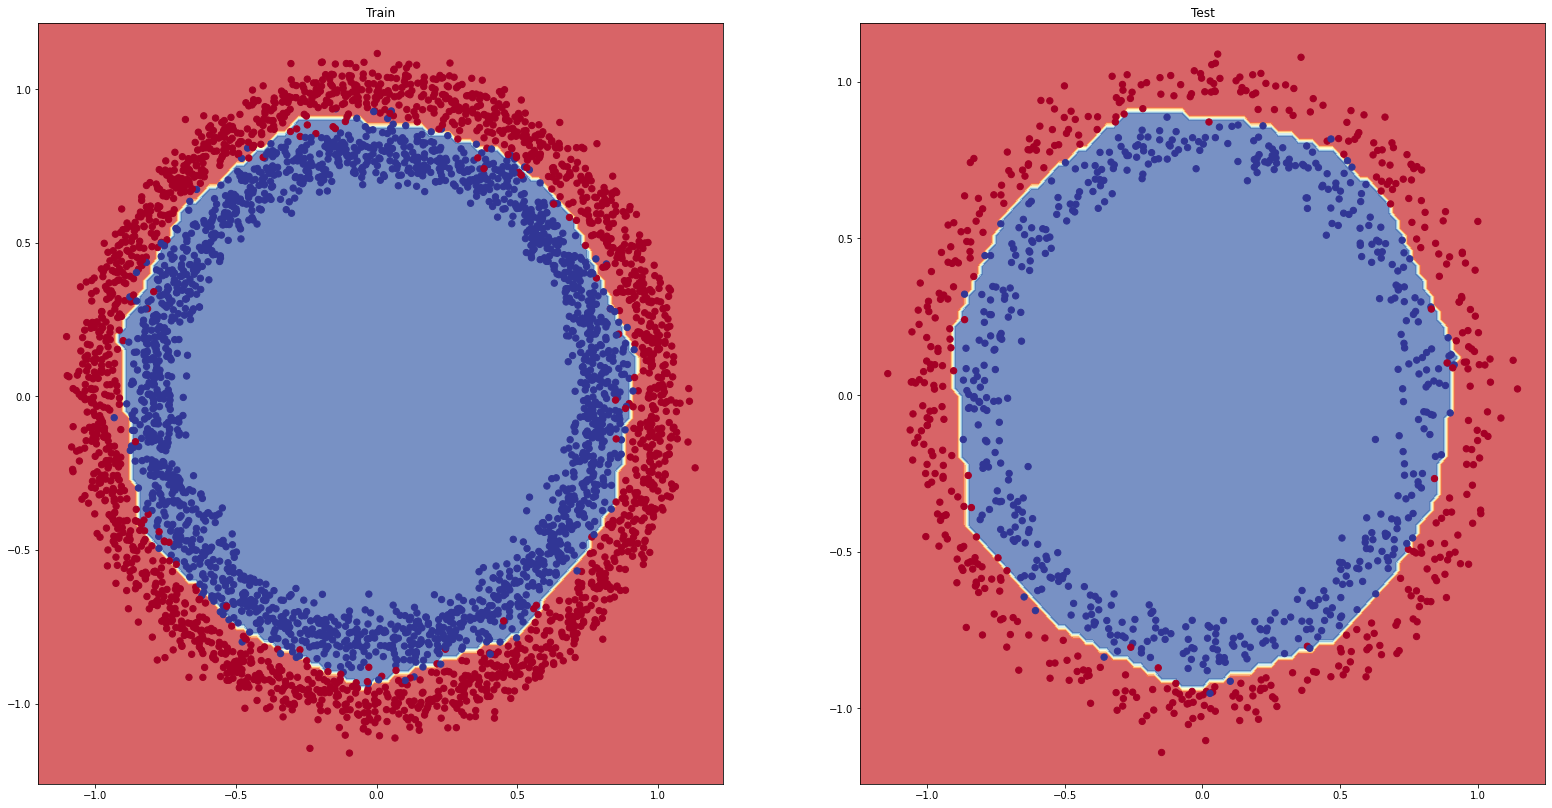

In [109]:
plt.figure(figsize=(27, 14))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, x_test, y_test)